In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [3]:
palette = ['black', 'darkred', 'darkolivegreen', 'darkgoldenrod', 'navy', 'darkmagenta'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Data rate [Mbps]"

In [4]:
data = pd.read_csv('load.csv').drop_duplicates()
data

,rngRun,nStations,distance,linksNumber,loss,jitter,latency,throughput,dataRate
0,407456,1,0,1,0.00700,0.000035,0.000174,9.9993,10
1,407456,1,0,2,0.00500,0.000042,0.000180,9.9995,10
2,407456,1,0,1,0.00850,0.000020,0.000178,19.9983,20
3,407456,1,0,3,0.00800,0.000046,0.000186,9.9992,10
4,407456,1,0,2,0.00600,0.000024,0.000185,19.9988,20
...,...,...,...,...,...,...,...,...,...
130,407458,1,0,1,14.50130,0.000026,0.723857,128.2480,150
131,407458,1,0,2,8.69075,0.000016,0.516131,127.8330,140
132,407458,1,0,3,8.84390,0.000016,0.526230,127.6190,140
133,407458,1,0,2,14.78270,0.000027,0.725701,127.8260,150


C:\Users\Admin\AppData\Local\Temp\ipykernel_5252\2006149990.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


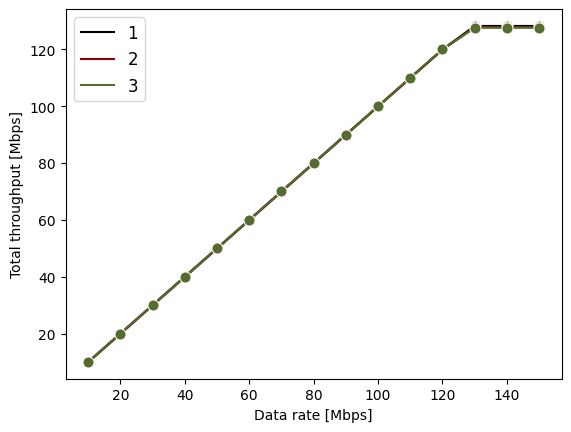

In [6]:
plot_sum = data.groupby(['distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dataRate_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5252\2062718694.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


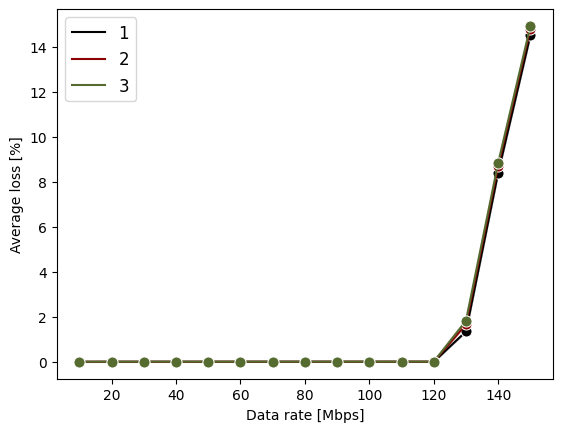

In [7]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Average loss [%]')
plt.savefig('dataRate_loss.svg', bbox_inches='tight')

In [6]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_5252\3692953480.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


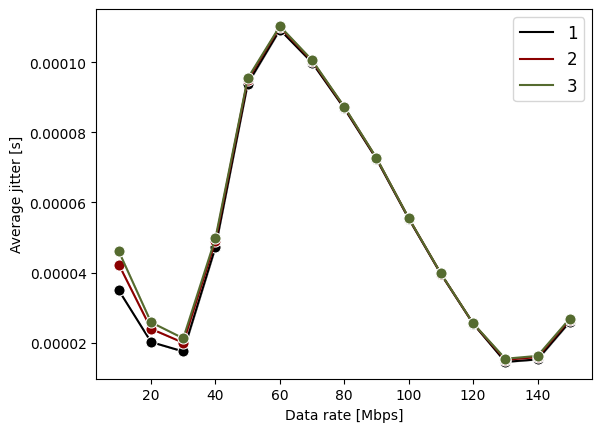

In [8]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Average jitter [s]')
plt.savefig('dataRate_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5252\3470615173.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


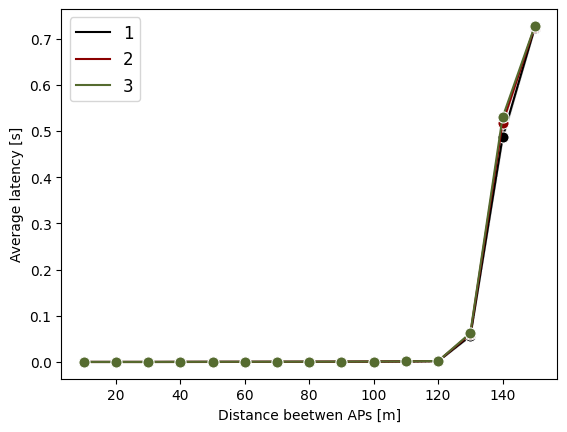

In [9]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1', '2', '3'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel='Distance beetwen APs [m]', ylabel='Average latency [s]')
plt.savefig('dataRate_lat.svg', bbox_inches='tight')